In [494]:
import pandas as pd
import numpy as np
import csv
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.cross_validation import train_test_split
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.grid_search import GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import roc_curve, auc
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
from IPython.display import Image
from sklearn import tree
import pydotplus
import os
from os import system
from sklearn.linear_model import LogisticRegression

In [495]:
shows = pd.read_csv('good_shows_data2.csv')

In [496]:
pd.set_option('max_seq_items', 200)

In [497]:
shows.shape

(2515, 168)

In [498]:
## dropping old shows
shows = shows[shows['release_date']>=1980]

In [499]:
## dropping shows where I don't know whether they were cancelled
shows = shows[shows['seasons'] != 0]

In [500]:
shows.shape

(2061, 168)

In [501]:
shows.columns

Index([u'json', u'title_rough', u'check', u'title', u'imdb_id', u'big_json',
       u'seasons', u'cancelled', u'runtime', u'genres', u'imdb_rating',
       u'release_date', u'plot', u'year', u'type', u'votes', u'keywords',
       u'first_year', u'is_new', u'fixed_runtime', u'is_action',
       u'is_adventure', u'is_animation', u'is_biography', u'is_comedy',
       u'is_crime', u'is_documentary', u'is_drama', u'is_family',
       u'is_fantasy', u'is_game', u'is_history', u'is_horror', u'is_music',
       u'is_musical', u'is_mystery', u'is_news', u'is_reality', u'is_romance',
       u'is_sci', u'is_short', u'is_sport', u'is_talk', u'is_thriller',
       u'is_war', u'is_western', u'release_month', u'release_weekday',
       u'release_monthday', u'stemmed_plot', u'stemmed_keywords',
       u'keyword_adult', u'keyword_african', u'keyword_alien',
       u'keyword_american', u'keyword_angel', u'keyword_anim', u'keyword_base',
       u'keyword_best', u'keyword_black', u'keyword_book', u'keywor

In [502]:
shows.dtypes

json                  object
title_rough           object
check                  int64
title                 object
imdb_id               object
big_json              object
seasons                int64
cancelled              int64
runtime               object
genres                object
imdb_rating          float64
release_date          object
plot                  object
year                  object
type                  object
votes                 object
keywords              object
first_year             int64
is_new                 int64
fixed_runtime        float64
is_action              int64
is_adventure           int64
is_animation           int64
is_biography           int64
is_comedy              int64
is_crime               int64
is_documentary         int64
is_drama               int64
is_family              int64
is_fantasy             int64
                      ...   
from_CBS               int64
from_Fox               int64
from_Nickelodeon       int64
from_Cartoon  

In [503]:
shows = shows.drop(['json', u'title_rough', u'check', u'title', 'imdb_id', u'big_json',
       u'seasons', 'runtime', u'genres', u'imdb_rating',
       u'release_date', u'plot', u'year', u'type', u'votes', u'keywords', u'is_new', 
        'stemmed_plot', u'stemmed_keywords', 'plot_cleaned', u'network', 'release_month', 'release_weekday', 'fixed_runtime', 'keyword_new'], axis=1)

In [504]:
shows.shape

(2061, 143)

In [505]:
shows.columns

Index([u'cancelled', u'first_year', u'is_action', u'is_adventure',
       u'is_animation', u'is_biography', u'is_comedy', u'is_crime',
       u'is_documentary', u'is_drama', u'is_family', u'is_fantasy', u'is_game',
       u'is_history', u'is_horror', u'is_music', u'is_musical', u'is_mystery',
       u'is_news', u'is_reality', u'is_romance', u'is_sci', u'is_short',
       u'is_sport', u'is_talk', u'is_thriller', u'is_war', u'is_western',
       u'release_monthday', u'keyword_adult', u'keyword_african',
       u'keyword_alien', u'keyword_american', u'keyword_angel',
       u'keyword_anim', u'keyword_base', u'keyword_best', u'keyword_black',
       u'keyword_book', u'keyword_boy', u'keyword_boyfriend',
       u'keyword_brother', u'keyword_california', u'keyword_celebr',
       u'keyword_charact', u'keyword_child', u'keyword_citi',
       u'keyword_comedi', u'keyword_comedian', u'keyword_comic',
       u'keyword_cult', u'keyword_daughter', u'keyword_death',
       u'keyword_detect', u'keyw

In [506]:
shows.shape

(2061, 143)

In [507]:
shows.dropna().shape

(2061, 143)

In [508]:
## defining dependent/independent variables
y = shows['cancelled']
x = shows.drop('cancelled', axis=1)

In [509]:
## Base probability
y.mean()

0.39349830179524503

In [510]:
## train/test split
x_train, x_test, y_train, y_test = train_test_split(x,y)

In [511]:
x_train.shape

(1545, 142)

In [512]:
x_test.shape

(516, 142)

In [513]:
y_train.shape

(1545,)

In [514]:
y_test.shape

(516,)

In [515]:
## runs model
def run_model(x_train, y_train, x_test, y_test, model):
    model.fit(x_train, y_train)
    print "Training set score: ", model.score(x_train, y_train)
    print "Test set score: ", model.score(x_test, y_test)
    predictions = model.predict(x_test)
    print "\nConfusion Matrix:\n", pd.DataFrame(confusion_matrix(y_test, predictions), 
                                              columns=['predicted_0', 'predicted_1'], index=['is_0', 'is_1'])
    print "\nClassification Report:\n",classification_report(y_test, predictions)

In [516]:
## plots ROC curve
def plot_roc(x_test, y_test, model):
    fpr, tpr, _ = roc_curve(y_test, model.predict_proba(x_test)[:,1])
    roc_auc = auc(fpr, tpr)
    print 'ROC AUC: %0.2f' % roc_auc
    plt.figure()
    plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')
    plt.legend(loc="lower right")
    plt.show()

## Random Forest

In [517]:
rf = RandomForestClassifier()

In [518]:
run_model(x_train, y_train, x_test, y_test, rf)

Training set score:  0.97928802589
Test set score:  0.664728682171

Confusion Matrix:
      predicted_0  predicted_1
is_0          263           44
is_1          129           80

Classification Report:
             precision    recall  f1-score   support

          0       0.67      0.86      0.75       307
          1       0.65      0.38      0.48       209

avg / total       0.66      0.66      0.64       516



In [519]:
rf.predict_proba(x_test)

array([[ 0.5,  0.5],
       [ 0.9,  0.1],
       [ 0.4,  0.6],
       ..., 
       [ 0.8,  0.2],
       [ 0.3,  0.7],
       [ 0.8,  0.2]])

ROC AUC: 0.68


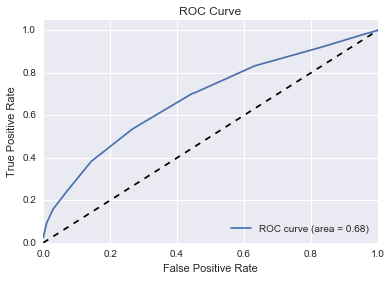

In [520]:
plot_roc(x_test, y_test, rf)

## Random Forest with grid search

In [521]:
parameters = {
    "n_estimators" : [10, 25, 50, 100],
    "max_depth" : [5,7,10,15],
    "max_features" : [0.25, 0.5, 0.75],
    "min_samples_leaf" : [2,4]
}

In [522]:
gs_rf = RandomForestClassifier()
grid_search = GridSearchCV(gs_rf,param_grid=parameters, cv=7, n_jobs=-1)

In [523]:
## 12:21 - 12:22
grid_search.fit(x_train, y_train)

GridSearchCV(cv=7, error_score='raise',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
       fit_params={}, iid=True, n_jobs=-1,
       param_grid={'n_estimators': [10, 25, 50, 100], 'max_features': [0.25, 0.5, 0.75], 'max_depth': [5, 7, 10, 15], 'min_samples_leaf': [2, 4]},
       pre_dispatch='2*n_jobs', refit=True, scoring=None, verbose=0)

In [524]:
grid_search.best_estimator_

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=10, max_features=0.5, max_leaf_nodes=None,
            min_samples_leaf=2, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=25, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [525]:
run_model(x_train, y_train, x_test, y_test, grid_search.best_estimator_)

Training set score:  0.851779935275
Test set score:  0.668604651163

Confusion Matrix:
      predicted_0  predicted_1
is_0          260           47
is_1          124           85

Classification Report:
             precision    recall  f1-score   support

          0       0.68      0.85      0.75       307
          1       0.64      0.41      0.50       209

avg / total       0.66      0.67      0.65       516



ROC AUC: 0.68


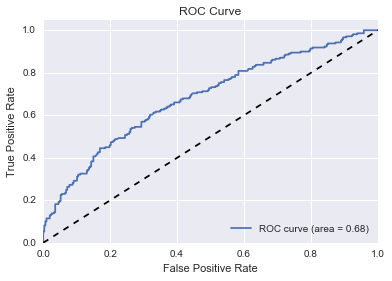

In [526]:
plot_roc(x_test, y_test, grid_search.best_estimator_)

In [527]:
grid_search.best_estimator_.predict_proba(x_test)

array([[ 0.51878096,  0.48121904],
       [ 0.64204041,  0.35795959],
       [ 0.32496471,  0.67503529],
       ..., 
       [ 0.69575758,  0.30424242],
       [ 0.50457506,  0.49542494],
       [ 0.82487924,  0.17512076]])

In [528]:
rf_feature_importances = pd.DataFrame(grid_search.best_estimator_.feature_importances_,
                                   index = x_train.columns,
                                    columns=['importance']).sort_values('importance',
                                    ascending=False)
rf_feature_importances.head(20)

,importance
release_monthday,0.094498
first_year,0.074257
keyword_relationship,0.053836
keyword_fiction,0.038490
from_ABC,0.032458
started_september,0.029635
keyword_charact,0.027427
keyword_femal,0.022980
started_friday,0.022278
half_hour,0.019918


## Decision Tree

In [529]:
DecisionTreeClassifier?

In [530]:
DecisionTreeClassifier()

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best')

In [531]:
## tune hyperparameters here
dt = DecisionTreeClassifier(
    max_depth=15, 
    min_samples_leaf=4,
    max_leaf_nodes=8,
    criterion='gini'
)

In [532]:
run_model(x_train, y_train, x_test, y_test, dt)

Training set score:  0.644012944984
Test set score:  0.612403100775

Confusion Matrix:
      predicted_0  predicted_1
is_0          297           10
is_1          190           19

Classification Report:
             precision    recall  f1-score   support

          0       0.61      0.97      0.75       307
          1       0.66      0.09      0.16       209

avg / total       0.63      0.61      0.51       516



ROC AUC: 0.61


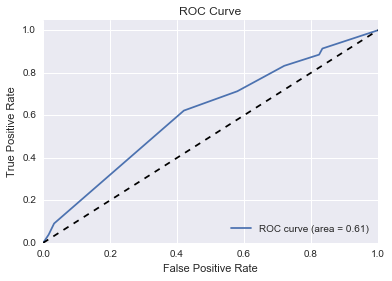

In [533]:
plot_roc(x_test, y_test, dt)

In [534]:
def tune_predictions(model, x_test, y_test, probability):
    predict = model.predict_proba(x_test)
    new_predictions = []
    for i in predict:
        if i[1] >= probability:
            new_predictions.append(1)
        else:
            new_predictions.append(0)
    print "Confusion Matrix:\n", pd.DataFrame(confusion_matrix(y_test, new_predictions), 
                                              columns=['predicted_0', 'predicted_1'], index=['is_0', 'is_1'])
    print "\nClassification Report:\n", classification_report(y_test, new_predictions)
    plt.hist(new_predictions)
    plt.xlabel('New Predictions')
    plt.ylabel('Frequency')
    plt.title('Distribution of New Predictions')
    plt.show()

Confusion Matrix:
      predicted_0  predicted_1
is_0           86          221
is_1           35          174

Classification Report:
             precision    recall  f1-score   support

          0       0.71      0.28      0.40       307
          1       0.44      0.83      0.58       209

avg / total       0.60      0.50      0.47       516



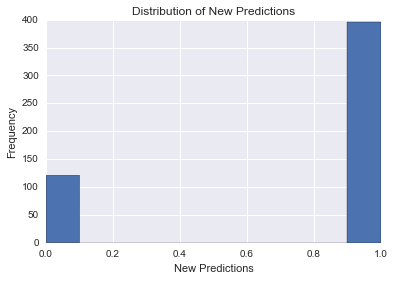

In [535]:
tune_predictions(dt, x_test, y_test, .30)

Confusion Matrix:
      predicted_0  predicted_1
is_0          297           10
is_1          190           19

Classification Report:
             precision    recall  f1-score   support

          0       0.61      0.97      0.75       307
          1       0.66      0.09      0.16       209

avg / total       0.63      0.61      0.51       516



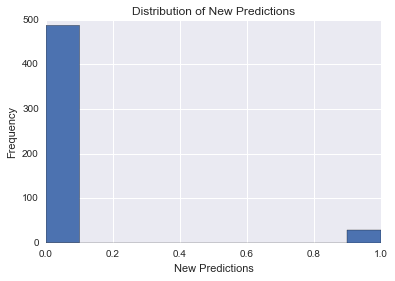

In [536]:
tune_predictions(dt, x_test, y_test, .60)

In [537]:
## plots the distribution of prediction probabilities for the 1 class
def plot_proba(x_test, model):
    predict = model.predict_proba(x_test)
    plt.hist(predict[:,1], bins=40)
    plt.ylabel('Frequency')
    plt.xlabel('Class 1 Probability Cutoff')
    plt.show()

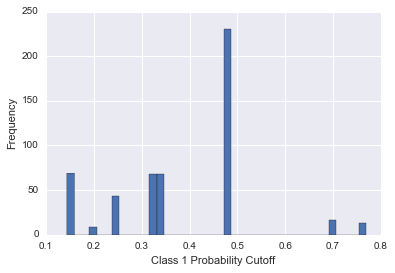

In [538]:
plot_proba(x_test, dt)

(array([   7.,    0.,  200.,   17.,   17.,  186.,    0.,    0.,    0.,   89.]),
 array([ 0.125     ,  0.17825342,  0.23150685,  0.28476027,  0.3380137 ,
         0.39126712,  0.44452055,  0.49777397,  0.5510274 ,  0.60428082,
         0.65753425]),
 <a list of 10 Patch objects>)

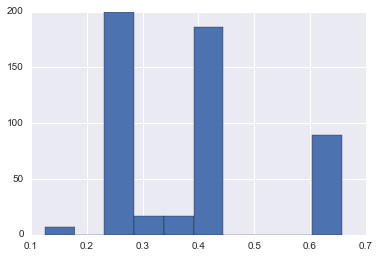

In [539]:
plt.hist(predict[:,1])

([array([   0.,    0.,   89.,    0.,    0.,  186.,   17.,   61.,  156.,    7.]),
  array([   7.,  156.,   61.,   17.,  186.,    0.,    0.,   89.,    0.,    0.])],
 array([ 0.125,  0.2  ,  0.275,  0.35 ,  0.425,  0.5  ,  0.575,  0.65 ,
         0.725,  0.8  ,  0.875]),
 <a list of 2 Lists of Patches objects>)

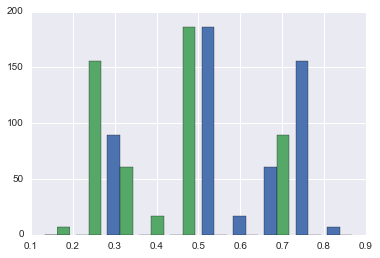

In [540]:
plt.hist(predict)

(array([ 427.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,   89.]),
 array([ 0. ,  0.1,  0.2,  0.3,  0.4,  0.5,  0.6,  0.7,  0.8,  0.9,  1. ]),
 <a list of 10 Patch objects>)

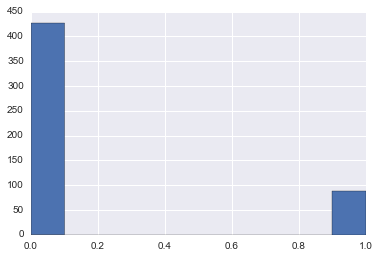

In [541]:
plt.hist(predictions_60)

In [542]:
predictions_60

[0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,


In [543]:
confusion_matrix(y_test, predictions_60)

array([[258,  49],
       [169,  40]])

Confusion Matrix:
      predicted_0  predicted_1
is_0           86          221
is_1           35          174

Classification Report:
             precision    recall  f1-score   support

          0       0.71      0.28      0.40       307
          1       0.44      0.83      0.58       209

avg / total       0.60      0.50      0.47       516



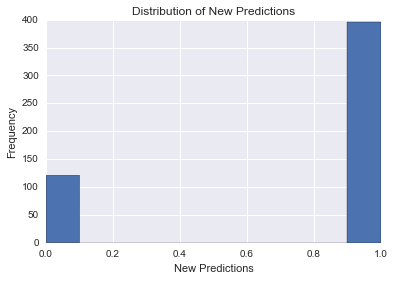

In [544]:
tune_predictions(dt, x_test, y_test, .30)

Confusion Matrix:
      predicted_0  predicted_1
is_0          178          129
is_1           79          130

Classification Report:
             precision    recall  f1-score   support

          0       0.69      0.58      0.63       307
          1       0.50      0.62      0.56       209

avg / total       0.62      0.60      0.60       516



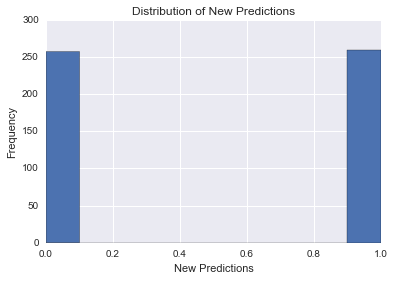

In [545]:
tune_predictions(dt, x_test, y_test, .40)

## grid-searching the decision tree

In [546]:
dt_for_gs = DecisionTreeClassifier()

In [547]:
params_dt = {
    "max_depth":[10,15,20],
    "min_samples_leaf":[2,3,4,5],
    "max_leaf_nodes":[4,6,8,10],
    "criterion":['gini', 'entropy']
}

In [548]:
gs_dt = GridSearchCV(dt_for_gs, params_dt)

In [549]:
gs_dt.fit(x_train, y_train)

GridSearchCV(cv=None, error_score='raise',
       estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best'),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'max_leaf_nodes': [4, 6, 8, 10], 'criterion': ['gini', 'entropy'], 'max_depth': [10, 15, 20], 'min_samples_leaf': [2, 3, 4, 5]},
       pre_dispatch='2*n_jobs', refit=True, scoring=None, verbose=0)

In [550]:
gs_dt.best_estimator_

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=10,
            max_features=None, max_leaf_nodes=8, min_samples_leaf=2,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best')

In [551]:
run_model(x_train, y_train, x_test, y_test, gs_dt.best_estimator_)

Training set score:  0.644012944984
Test set score:  0.612403100775

Confusion Matrix:
      predicted_0  predicted_1
is_0          297           10
is_1          190           19

Classification Report:
             precision    recall  f1-score   support

          0       0.61      0.97      0.75       307
          1       0.66      0.09      0.16       209

avg / total       0.63      0.61      0.51       516



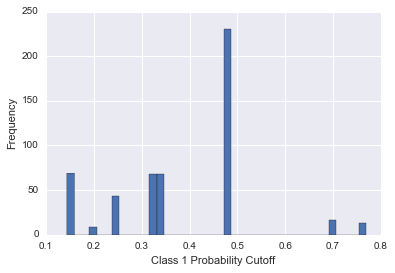

In [552]:
## in the original model, the false negatives were higher than the true positives. This is terrible, and needs fixing.


plot_proba(x_test, gs_dt.best_estimator_)

Confusion Matrix:
      predicted_0  predicted_1
is_0          178          129
is_1           79          130

Classification Report:
             precision    recall  f1-score   support

          0       0.69      0.58      0.63       307
          1       0.50      0.62      0.56       209

avg / total       0.62      0.60      0.60       516



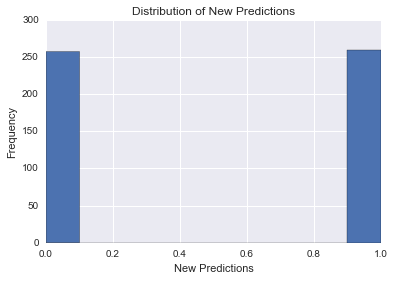

In [553]:
## with probability=0.4, model score is 0.62. the false negatives are down, but the false positives are up.
tune_predictions(gs_dt, x_test, y_test, .40)

In [554]:
confusion_matrix(y_test, predictions_60)

array([[258,  49],
       [169,  40]])

In [555]:
cmatrix = confusion_matrix(y_test, predictions_60)

In [556]:
cmatrix[0,0]

258

In [557]:
def get_predictions(model, x_test, y_test, probability):
    predict = model.predict_proba(x_test)
    new_predictions = []
    for i in predict:
        if i[1] >= probability:
            new_predictions.append(1)
        else:
            new_predictions.append(0)
    return new_predictions

In [558]:
def find_optimal_probability(model, x_test, y_test):
    probabilities = range(1,101)
    new_probabilities = []
    for i in probabilities:
        new_probabilities.append(float(i)/100)
    range_of_scores = []
    for i in new_probabilities:
        new_preds = get_predictions(model, x_test, y_test, i)
        cmatrix = confusion_matrix(y_test, new_preds)
        new_model_score = (cmatrix[0,0] + cmatrix[1,1])/float(np.sum(cmatrix))
        range_of_scores.append(new_model_score)
    
    plt.plot(new_probabilities, range_of_scores)
    plt.title("Model Scores at Different Cutoff Probabilities")
    plt.xlabel("Probability Cutoff")
    plt.ylabel("Model Score")
    plt.show()

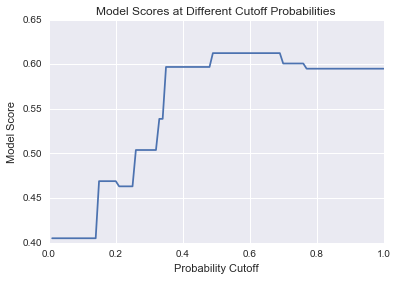

In [559]:
find_optimal_probability(dt, x_test, y_test)

## Gradient Boosting

In [560]:
GradientBoostingClassifier?

In [561]:
GradientBoostingClassifier()

GradientBoostingClassifier(init=None, learning_rate=0.1, loss='deviance',
              max_depth=3, max_features=None, max_leaf_nodes=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=100,
              presort='auto', random_state=None, subsample=1.0, verbose=0,
              warm_start=False)

In [562]:
boost_default = GradientBoostingClassifier()

In [563]:
boost = GradientBoostingClassifier(
    n_estimators=500, 
    max_depth= 6,
    learning_rate= 0.1, 
    min_samples_leaf=2
    )

In [564]:
run_model(x_train, y_train, x_test, y_test, boost)

Training set score:  0.999352750809
Test set score:  0.670542635659

Confusion Matrix:
      predicted_0  predicted_1
is_0          219           88
is_1           82          127

Classification Report:
             precision    recall  f1-score   support

          0       0.73      0.71      0.72       307
          1       0.59      0.61      0.60       209

avg / total       0.67      0.67      0.67       516



In [565]:
run_model(x_train, y_train, x_test, y_test, boost_default)

Training set score:  0.794822006472
Test set score:  0.682170542636

Confusion Matrix:
      predicted_0  predicted_1
is_0          255           52
is_1          112           97

Classification Report:
             precision    recall  f1-score   support

          0       0.69      0.83      0.76       307
          1       0.65      0.46      0.54       209

avg / total       0.68      0.68      0.67       516



In [566]:
boost_feature_importances = pd.DataFrame(boost_default.feature_importances_,
                                   index = x_train.columns,
                                    columns=['importance']).sort_values('importance',
                                    ascending=False)
boost_feature_importances.head(20)

,importance
first_year,0.095331
release_monthday,0.071628
keyword_fiction,0.026872
from_ABC,0.025972
is_reality,0.025907
half_hour,0.025436
keyword_relationship,0.023807
keyword_charact,0.023028
started_september,0.022471
is_family,0.021745


## ADA Boosting

In [567]:
ada_boost = AdaBoostClassifier(n_estimators=100)

In [584]:
## gradient boost for reference
run_model(x_train, y_train, x_test, y_test, boost)

Training set score:  0.999352750809
Test set score:  0.651162790698

Confusion Matrix:
      predicted_0  predicted_1
is_0          221           86
is_1           94          115

Classification Report:
             precision    recall  f1-score   support

          0       0.70      0.72      0.71       307
          1       0.57      0.55      0.56       209

avg / total       0.65      0.65      0.65       516



In [568]:
## ada boost
run_model(x_train, y_train, x_test, y_test, ada_boost)

Training set score:  0.739158576052
Test set score:  0.68992248062

Confusion Matrix:
      predicted_0  predicted_1
is_0          237           70
is_1           90          119

Classification Report:
             precision    recall  f1-score   support

          0       0.72      0.77      0.75       307
          1       0.63      0.57      0.60       209

avg / total       0.69      0.69      0.69       516



ROC AUC: 0.72


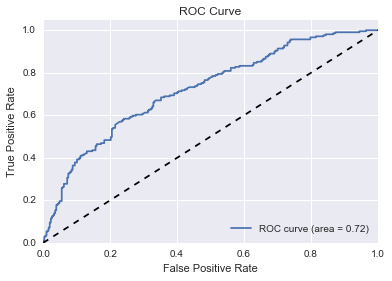

In [569]:
plot_roc(x_test, y_test, ada_boost)

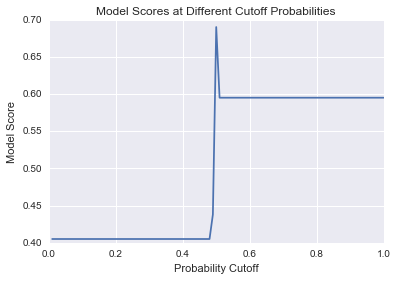

In [570]:
find_optimal_probability(ada_boost, x_test, y_test)

In [571]:
adaboost_feature_importances = pd.DataFrame(ada_boost.feature_importances_,
                                   index = x_train.columns,
                                    columns=['importance']).sort_values('importance',
                                    ascending=False)
adaboost_feature_importances.head(20)

,importance
first_year,0.08
half_hour,0.03
release_monthday,0.03
is_reality,0.03
is_mystery,0.02
started_friday,0.02
from_NBC,0.02
from_ABC,0.02
keyword_spoof,0.02
keyword_relationship,0.02


## Decision tree for show

In [572]:
## this will create a single decision tree from the whole dataset that is readable by humans. 
## for display purposes only. it will be tuned to have approximately the same score as the AdaBoost model

dt_for_show = DecisionTreeClassifier(
                    max_depth=7,
                    min_samples_leaf=5,
#                     max_leaf_nodes=10
#     class_weight=None, criterion='gini', max_depth=10,
#             max_features=None, max_leaf_nodes=10, min_samples_leaf=2,
#             min_samples_split=2, min_weight_fraction_leaf=0.0,
#             presort=False, random_state=None, splitter='best'
)

In [573]:
dt_for_show.fit(x,y)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=7,
            max_features=None, max_leaf_nodes=None, min_samples_leaf=5,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best')

In [574]:
dt_for_show.score(x,y)

0.70111596312469671

In [575]:
## exporting decision tree to png

dtree = dt_for_show.fit(x, y)

dotfile = open("dtree2.dot", 'w')
tree.export_graphviz(dtree, 
                     out_file = dotfile, 
                     feature_names = x.columns, 
                     class_names=['renewed', 'cancelled'],  
                     filled=True, 
                     rounded=True,
                     special_characters=True,
                     impurity=False,
                     label='none'
                    )
dotfile.close()

system('dot -Tpng dtree2.dot -o dtree2.png')

0

In [576]:
dt_show_feature_importances = pd.DataFrame(dt_for_show.feature_importances_,
                                   index = x_train.columns,
                                    columns=['importance']).sort_values('importance',
                                    ascending=False)
dt_show_feature_importances.head(20)

,importance
keyword_relationship,0.145921
release_monthday,0.123964
keyword_charact,0.078516
started_september,0.074221
keyword_fiction,0.068640
is_comedy,0.048221
half_hour,0.048042
first_year,0.039078
keyword_cult,0.029963
keyword_friend,0.023861


## Logistic regression

In [577]:
lr = LogisticRegression()

In [578]:
run_model(x_train, y_train, x_test, y_test, lr)

Training set score:  0.728155339806
Test set score:  0.651162790698

Confusion Matrix:
      predicted_0  predicted_1
is_0          227           80
is_1          100          109

Classification Report:
             precision    recall  f1-score   support

          0       0.69      0.74      0.72       307
          1       0.58      0.52      0.55       209

avg / total       0.65      0.65      0.65       516



In [579]:
coefficients = lr.coef_

In [580]:
coefficients[:,1]

array([-0.03364439])

In [581]:
x.columns[0]

'first_year'

In [582]:
zip(x.columns, coefficients[0])

[('first_year', 0.00039318007815372896),
 ('is_action', -0.033644390285361474),
 ('is_adventure', 0.43154671010072726),
 ('is_animation', -0.28211972120230916),
 ('is_biography', 0.20681026540445507),
 ('is_comedy', -0.15184245322601522),
 ('is_crime', -0.46381177665531537),
 ('is_documentary', -1.0303886308115469),
 ('is_drama', 0.27125011839746382),
 ('is_family', -0.66295713926366096),
 ('is_fantasy', -0.72015305644547234),
 ('is_game', -0.55938403029646844),
 ('is_history', -0.1456086159094398),
 ('is_horror', 0.28532282935326353),
 ('is_music', 0.2108120097697499),
 ('is_musical', -0.043840812853641088),
 ('is_mystery', -0.96823312630691705),
 ('is_news', -0.66651616536598857),
 ('is_reality', -0.85362564103433203),
 ('is_romance', -0.67178442175965292),
 ('is_sci', 0.3807629076967684),
 ('is_short', -0.16092260110790915),
 ('is_sport', -0.76681710242591128),
 ('is_talk', -1.0953479005927127),
 ('is_thriller', 0.26948461905966342),
 ('is_war', 0.0080711871492037107),
 ('is_western

In [583]:
x['started_saturday'].sum()

0